In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py

# sns.set(style="darkgrid")


# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Reading and Understanding the Data

Import and read the dataset given

In [3]:
countries = pd.read_csv("Country-data.csv")
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# inspecting data and identifying total number of rows and for nulls in rows.
print(countries.shape)
print(countries.info())

(167, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB
None


In [5]:
# From above we can see there are no nulls in the dataframe and there are a total of 167 records.

countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
# All columns are numberic except country

countries['country'].unique()

# All country names are unique.

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

In [7]:
# Checking for unique values in all the columns

countries.nunique()

country       167
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64

In [8]:
# There are some fields which are not unique across all the rows but they all are numeric.
countries_df = countries.drop(['country' ], axis=1)

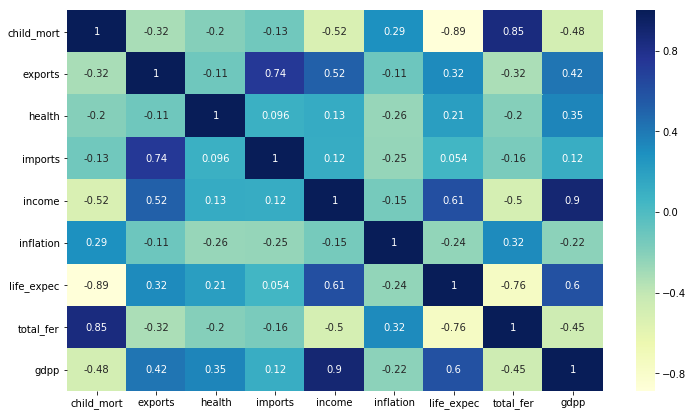

In [9]:
# Creating co-relation plot to check colinearity

plt.figure(figsize = (12, 7))
sns.heatmap(countries_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Observations:
1. Child mortality is highly co-related with total fertility and life expectancy (negatively).
2. Exports and imports are showing high corelation.
3. Income and GDP are highly co-related. Income is also showing good co-realtion with life expectancy.
4. Life expectancy is negatively co-related with Total Fertility and positively co-related with GDP.

In [10]:
# Checking at different percentiles at 25%,50%,75%,90%,95% and 99%

countries.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


We can observe that there are some outliers. We will do the outlier treatment post doing the PCA.

### PCA

In [11]:
# Scaling the data before doing the PCA
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
countries_scaled = standard_scaler.fit_transform(countries_df)

C:\Users\arisethi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

C:\Users\arisethi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



In [12]:
# Converting the scaled array to dataframe
countries_scaled_df = pd.DataFrame(countries_scaled)
countries_scaled_df.columns = ['child_mort','exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

countries_scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [13]:
# Improting the PCA module

from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [14]:
# Doing the PCA on the data

pca.fit(countries_scaled_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [15]:
colnames = list(countries_scaled_df.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,-0.419519,0.192884,child_mort
1,0.283897,0.613163,exports
2,0.150838,-0.243087,health
3,0.161482,0.671821,imports
4,0.398441,0.022536,income
5,-0.193173,-0.008404,inflation
6,0.425839,-0.222707,life_expec
7,-0.403729,0.155233,total_fer
8,0.392645,-0.046022,gdpp


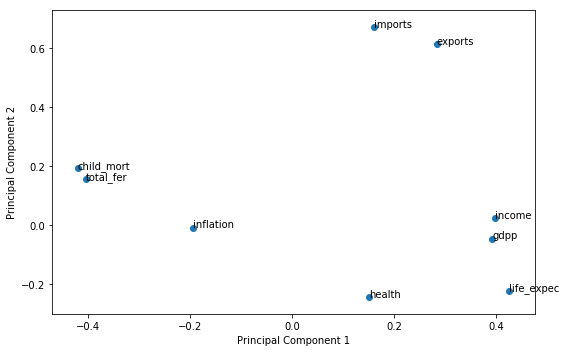

In [16]:
%matplotlib inline

fig = plt.figure(figsize = (8,5))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))

plt.tight_layout()
plt.show()

We can clearly see there are certain clusters to be formed based on above plot.

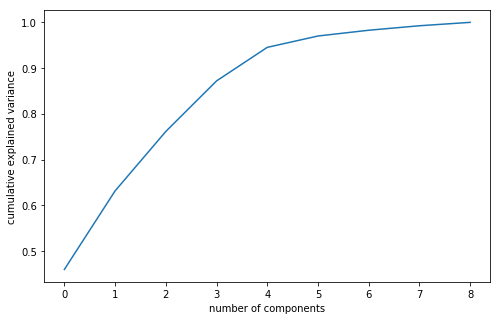

In [17]:
#Making the screeplot - plotting the cumulative variance against the number of components

%matplotlib inline

fig = plt.figure(figsize = (8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()



In [18]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

In [19]:
# From above we can see that 4 components explains around 87% of variance in the data.
# we dont need the independent PCA as the data size is small enough.

pca_final = PCA(svd_solver='randomized', random_state=42, n_components=4)

In [20]:
pca_matrix = pca_final.fit_transform(countries_scaled_df)
pca_matrix.shape

(167, 4)

In [21]:
# creating co-rrelation matrix for the principal components

corrmat = np.corrcoef(pca_matrix.transpose())

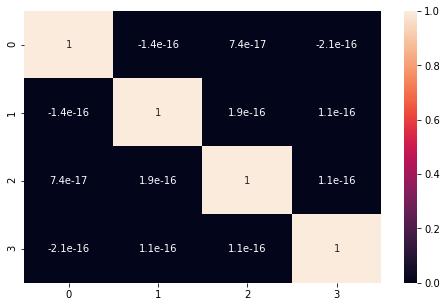

In [22]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (8,5))
sns.heatmap(corrmat,annot = True)
plt.show()

In [23]:
# 1s -> 0s in diagonals

corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 1.891291354146151e-16 , min corr:  -2.1400280604294126e-16


In [24]:
pca_df = pd.DataFrame(pca_matrix)

In [25]:
pca_df.head()

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063


In [26]:
# Renaming the column names
pca_df.columns = ['PC1', 'PC2', 'PC3', 'PC4']

pca_df.describe()

,PC1,PC2,PC3,PC4
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,5.052512e-17,2.891898e-17,-5.268573e-17,-4.121786e-17
std,2.039748e+00,1.247262e+00,1.085096e+00,1.000389e+00
min,-4.912066e+00,-2.997364e+00,-2.714085e+00,-1.595199e+00
25%,-1.382270e+00,-7.520480e-01,-5.218776e-01,-7.837847e-01
50%,2.240726e-02,-9.449868e-02,-2.456059e-01,-3.118565e-01
75%,1.224328e+00,5.534747e-01,4.025451e-01,7.107253e-01
max,6.917755e+00,6.682090e+00,6.110158e+00,3.129643e+00


In [27]:
pca_df.shape

(167, 4)

In [28]:
# Adding back the country column

pca_df['country'] = countries['country']
pca_df.head()

,PC1,PC2,PC3,PC4,country
0,-2.913025,0.095621,-0.718118,1.005255,Afghanistan
1,0.429911,-0.588156,-0.333486,-1.161059,Albania
2,-0.285225,-0.455174,1.221505,-0.868115,Algeria
3,-2.932423,1.695555,1.525044,0.839625,Angola
4,1.033576,0.136659,-0.225721,-0.847063,Antigua and Barbuda


#### Outlier Removal from the dataset

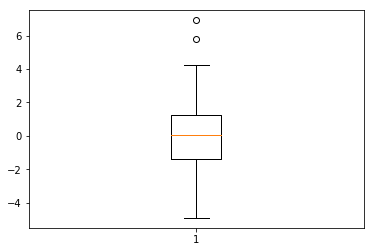

In [29]:
# outlier treatment for PC1

plt.boxplot(pca_df.PC1)
Q1 = pca_df.PC1.quantile(0.25)
Q3 = pca_df.PC1.quantile(0.75)
IQR = Q3 - Q1
pca_df1 = pca_df[(pca_df.PC1 >= Q1 - 1.5*IQR) & (pca_df.PC1 <= Q3 + 1.5*IQR)]

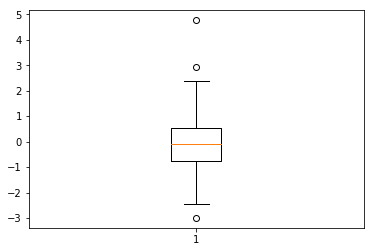

In [30]:
# outlier treatment for PC2

plt.boxplot(pca_df1.PC2)
Q1 = pca_df1.PC2.quantile(0.25)
Q3 = pca_df1.PC2.quantile(0.75)
IQR = Q3 - Q1
pca_df1 = pca_df1[(pca_df1.PC2 >= Q1 - 1.5*IQR) & (pca_df1.PC2 <= Q3 + 1.5*IQR)]

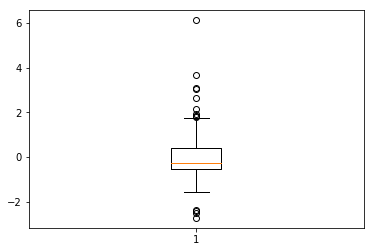

In [31]:
# outlier treatment for PC3

plt.boxplot(pca_df1.PC3)
Q1 = pca_df1.PC3.quantile(0.25)
Q3 = pca_df1.PC3.quantile(0.75)
IQR = Q3 - Q1
pca_df1 = pca_df1[(pca_df1.PC3 >= Q1 - 1.5*IQR) & (pca_df1.PC3 <= Q3 + 1.5*IQR)]

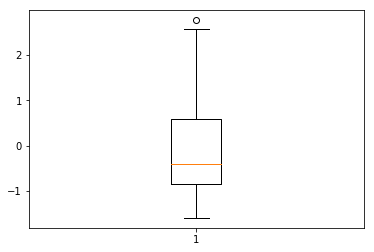

In [32]:
# outlier treatment for PC4

plt.boxplot(pca_df1.PC4)
Q1 = pca_df1.PC4.quantile(0.25)
Q3 = pca_df1.PC4.quantile(0.75)
IQR = Q3 - Q1
pca_df1 = pca_df1[(pca_df1.PC4 >= Q1 - 1.5*IQR) & (pca_df1.PC4 <= Q3 + 1.5*IQR)]

In [33]:
pca_df1.describe()

,PC1,PC2,PC3,PC4
count,147.000000,147.000000,147.000000,147.000000
mean,-0.170244,-0.144817,-0.118851,-0.124781
std,1.841422,0.943986,0.680299,0.894165
min,-4.409717,-2.435594,-1.565859,-1.595199
25%,-1.603737,-0.804434,-0.513363,-0.848759
50%,0.009618,-0.109453,-0.252772,-0.415582
75%,1.128732,0.510662,0.249706,0.562529
max,4.088544,2.176349,1.752241,2.581976


In [34]:
pca_df1.shape

(147, 5)

After outlier treatment only 147 countries remains.

#### Computing Hopkins Statistics

In [35]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [36]:
# If the value is between {0.65, ..., 0.99}, it has a high tendency to cluster.

df_outlier_done = pca_df1.drop('country', axis=1)
hopkins(df_outlier_done)

0.7487135442054275

So, we can say that data has high tendency for clustering.

#### Silhoutte Score Calculation

In [37]:

from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    #kmeans = KMeans(n_clusters=k).fit(df_outlier_done)
    #sse_.append([k, silhouette_score(df_outlier_done, kmeans.labels_)])

    #for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=k).fit(df_outlier_done)
    label = kmeans.labels_
    sil_coeff = silhouette_score(df_outlier_done, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(k, sil_coeff))
    sse_.append([k, silhouette_score(df_outlier_done, kmeans.labels_)])

For n_clusters=2, The Silhouette Coefficient is 0.4001559429752253
For n_clusters=3, The Silhouette Coefficient is 0.3785324011039642
For n_clusters=4, The Silhouette Coefficient is 0.3191034598716983
For n_clusters=5, The Silhouette Coefficient is 0.29948835285985337
For n_clusters=6, The Silhouette Coefficient is 0.2693599374767668
For n_clusters=7, The Silhouette Coefficient is 0.272194571575441
For n_clusters=8, The Silhouette Coefficient is 0.2822219937277797
For n_clusters=9, The Silhouette Coefficient is 0.2793046703650229


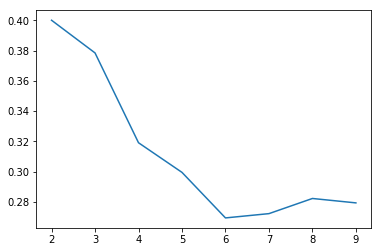

In [38]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.show()

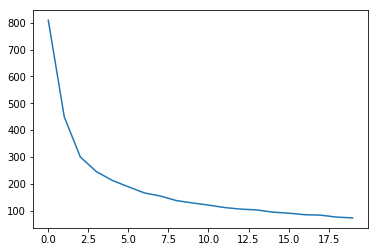

In [39]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=100)
    model_clus.fit(df_outlier_done)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)
plt.show()

#### K-Means

In [40]:
# Silhouette analysis can be used to study the separation distance between the resulting clusters. So we can choose based on
# above silhoutte value and elbow curve we will take k=5
# Kmeans with K=5

#df_outlier_done.index = pd.RangeIndex(len(df_outlier_done.index))
model_clus = KMeans(n_clusters = 5, max_iter=100, random_state=10)
model_clus.fit(df_outlier_done)

df_outlier_done = pd.concat([df_outlier_done, pd.Series(model_clus.labels_, index=df_outlier_done.index)], axis=1)

In [41]:
df_outlier_done.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'cluster_id']

In [42]:
# Clustered Dataset
df_outlier_done.head()

,PC1,PC2,PC3,PC4,cluster_id
0,-2.913025,0.095621,-0.718118,1.005255,4
1,0.429911,-0.588156,-0.333486,-1.161059,3
2,-0.285225,-0.455174,1.221505,-0.868115,3
3,-2.932423,1.695555,1.525044,0.839625,4
4,1.033576,0.136659,-0.225721,-0.847063,1


In [43]:
# Adding country back
df_outlier_done['country'] = pca_df1['country']

In [44]:
df_outlier_done.head()

,PC1,PC2,PC3,PC4,cluster_id,country
0,-2.913025,0.095621,-0.718118,1.005255,4,Afghanistan
1,0.429911,-0.588156,-0.333486,-1.161059,3,Albania
2,-0.285225,-0.455174,1.221505,-0.868115,3,Algeria
3,-2.932423,1.695555,1.525044,0.839625,4,Angola
4,1.033576,0.136659,-0.225721,-0.847063,1,Antigua and Barbuda


#### Adding cluster_ids to the outlier countries
We will find the cluster centers based on mean of PC components in each cluster and than find the nearest cluster center to the outlier data and assign that cluster id to it.

In [45]:
# Calculating means of PC to compute distances for the outliers

PC1_mean = pd.DataFrame(df_outlier_done.groupby(['cluster_id']).PC1.mean())
PC2_mean = pd.DataFrame(df_outlier_done.groupby(['cluster_id']).PC2.mean())
PC3_mean = pd.DataFrame(df_outlier_done.groupby(['cluster_id']).PC3.mean())
PC4_mean = pd.DataFrame(df_outlier_done.groupby(['cluster_id']).PC4.mean())

In [46]:
# Creating dataframe with cluster_id and cluster_centers for each.

ranked = pd.concat([pd.Series([0,1,2,3,4]), PC1_mean, PC2_mean, PC3_mean, PC4_mean ], axis=1)
ranked.columns = ['cluster_id', 'PC1_mean', 'PC2_mean', 'PC3_mean', 'PC4_mean']
ranked

,cluster_id,PC1_mean,PC2_mean,PC3_mean,PC4_mean
0,0,-1.732452,0.158313,0.081945,0.076225
1,1,0.823858,0.369471,-0.312134,-0.784885
2,2,2.523957,-1.008401,-0.384396,0.932635
3,3,-0.233629,-0.793041,0.289903,-0.794272
4,4,-3.080865,0.557857,-0.423225,1.069396


In [47]:
merged_countries = pd.merge(df_outlier_done, countries, how='right', on=['country'])

In [48]:
# Getting all the outlier countries i.e. without any cluster assignment

non_cluster = pca_df[pca_df['country'].isin(merged_countries[merged_countries['cluster_id'].isnull()]['country'])]
non_cluster.head()

,PC1,PC2,PC3,PC4,country
23,2.460086,0.016454,3.019840,0.776841,Brunei
49,-1.293423,2.363695,1.779334,1.737244,Equatorial Guinea
81,-1.239217,0.369138,-2.368274,0.592231,Kiribati
82,2.465659,0.088050,2.652268,0.708884,Kuwait
87,-1.803151,2.037851,-2.496885,1.072199,Lesotho


In [49]:
a = np.array(non_cluster[['PC1','PC2','PC3', 'PC4']])
b = np.array(ranked[['PC1_mean', 'PC2_mean', 'PC3_mean', 'PC4_mean']])
a.shape

(20, 4)

In [50]:
# Computing distance for outliers from cluster-centres and assigning cluster_id to them

dist = []
for i in range(0,len(a)):
    for j in range(0,len(b)):
        dist.append(np.linalg.norm(a[i]-b[j]))

# This list contains distance of each country in the outlier from all the cluster means. Converting it to an array.
array = np.asarray(dist).reshape(len(a),len(b))

# Generating a cluster_id based on minimum distance from cluster center.
cluster_id = np.argmin(array, axis=1)

In [51]:
# Resetting indexes in the outlier dataset and adding the newly generated cluster ids to them.
non_cluster.reset_index(inplace=True)
non_cluster['cluster_id'] = pd.Series(cluster_id)

In [52]:
non_cluster.set_index('index')

,PC1,PC2,PC3,PC4,country,cluster_id
index,,,,,,
23,2.460086,0.016454,3.019840,0.776841,Brunei,2
49,-1.293423,2.363695,1.779334,1.737244,Equatorial Guinea,0
81,-1.239217,0.369138,-2.368274,0.592231,Kiribati,0
82,2.465659,0.088050,2.652268,0.708884,Kuwait,2
87,-1.803151,2.037851,-2.496885,1.072199,Lesotho,4
88,-1.773580,1.053399,-2.390440,1.179569,Liberia,4
91,6.917755,4.849844,1.001837,3.129643,Luxembourg,2
98,3.679543,4.765486,-1.021313,-0.501107,Malta,1
101,-0.380929,0.101774,-2.714085,0.771974,"Micronesia, Fed. Sts.",1


#### Creating a final dataset having inital features with cluster_id.

In [53]:
without_outlier_df = pca_df.merge(df_outlier_done, left_on='country', right_on='country', how='left')

In [54]:
# Getting the dataframe after merging the outlier data with clustered data before outliers.

final_df = without_outlier_df.merge(non_cluster, left_on='country', right_on='country', how='left')
final_df.drop([ 'PC1_y','PC2_y', 'PC3_y', 'PC4_y', 'PC1', 'PC2','PC3', 'PC4', 'index'], inplace=True, axis=1)
final_df['cluster_id_x'].fillna(final_df['cluster_id_y'], inplace=True)
final_df.drop('cluster_id_y', inplace=True, axis=1)
final_df.columns = ['PC1','PC2','PC3','PC4', 'country', 'cluster_id']

In [55]:
# Getting the final dataset containing original features and cluster_ids

clustered_countries = final_df.merge(countries,left_on='country', right_on='country')
clustered_countries.drop(['PC1','PC2','PC3','PC4'], inplace=True, axis=1)
clustered_countries.head()

,country,cluster_id,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,4.0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,3.0,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,3.0,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,4.0,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,1.0,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [56]:
# Creating pivoted data for plotting based on cluster centers.

pivoted_data = pd.pivot_table(clustered_countries, values=['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp'], index=['cluster_id'], aggfunc=np.mean)
pivoted_data

,child_mort,exports,gdpp,health,imports,income,inflation,life_expec,total_fer
cluster_id,,,,,,,,,
0.0,63.900000,32.821852,2873.555556,5.920741,43.851852,5753.703704,12.220000,63.392593,4.321111
1.0,15.579167,59.689583,10706.375000,6.681875,65.637500,18121.666667,4.347271,74.260417,1.986875
2.0,4.825000,49.017857,47039.285714,9.509643,41.671429,47403.571429,2.436286,80.575000,1.820357
3.0,25.080000,27.499725,5900.200000,5.643500,31.871648,11654.500000,9.915650,72.997500,2.417500
4.0,115.820833,26.725833,850.583333,6.900833,43.933333,1853.875000,12.338125,55.445833,5.525000


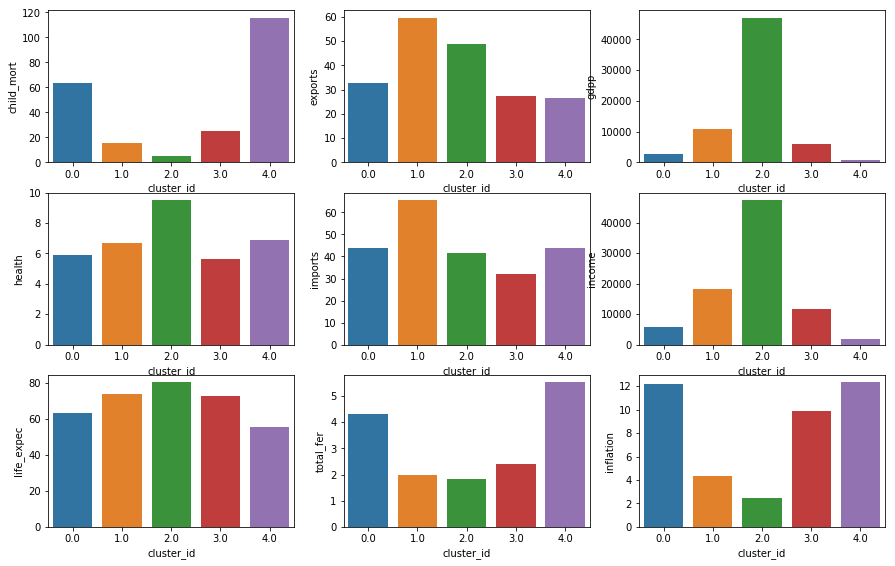

In [57]:
# Plotting single variable means with cluster_id

fig, axarr = plt.subplots(3, 3, figsize=(15, 9.5))
sns.barplot(x=pivoted_data.index, y=pivoted_data.child_mort,ax= axarr[0][0])
sns.barplot(x=pivoted_data.index, y=pivoted_data.exports,ax= axarr[0][1])
sns.barplot(x=pivoted_data.index, y=pivoted_data.gdpp,ax= axarr[0][2])
sns.barplot(x=pivoted_data.index, y=pivoted_data.health,ax= axarr[1][0])
sns.barplot(x=pivoted_data.index, y=pivoted_data.imports,ax= axarr[1][1])
sns.barplot(x=pivoted_data.index, y=pivoted_data.income,ax= axarr[1][2])
sns.barplot(x=pivoted_data.index, y=pivoted_data.life_expec,ax= axarr[2][0])
sns.barplot(x=pivoted_data.index, y=pivoted_data.total_fer,ax= axarr[2][1])
sns.barplot(x=pivoted_data.index, y=pivoted_data.inflation,ax= axarr[2][2])
plt.show()

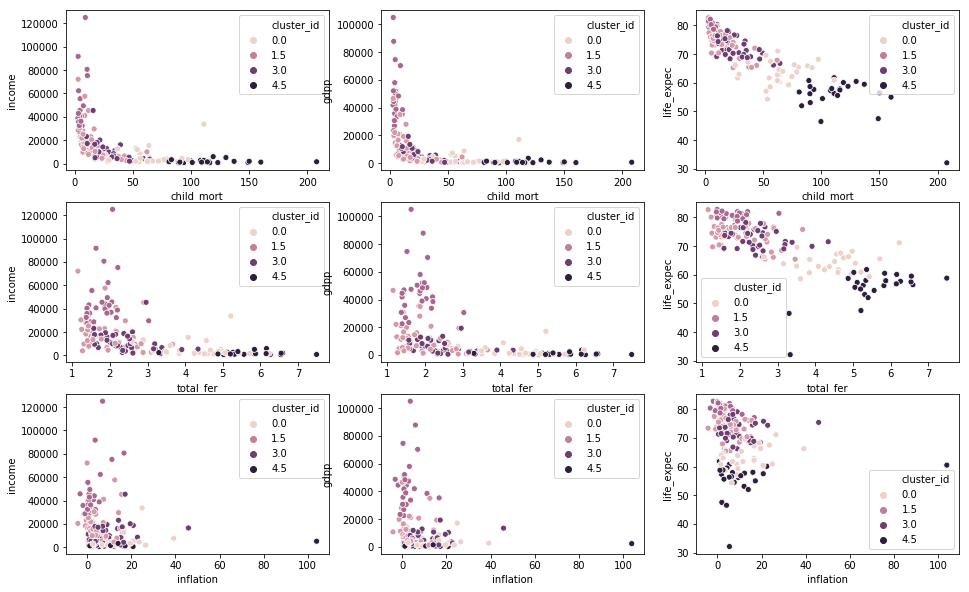

In [58]:
fig, axarr = plt.subplots(3, 3, figsize=(16, 10))

sns.scatterplot(x='child_mort', y='income', hue='cluster_id', data=clustered_countries, ax= axarr[0][0])
sns.scatterplot(x='child_mort', y='gdpp', hue='cluster_id', data=clustered_countries, ax= axarr[0][1])
sns.scatterplot(x='child_mort', y='life_expec', hue='cluster_id', data=clustered_countries, ax= axarr[0][2])
sns.scatterplot(x='total_fer', y='income', hue='cluster_id', data=clustered_countries, ax= axarr[1][0])
sns.scatterplot(x='total_fer', y='gdpp', hue='cluster_id', data=clustered_countries, ax= axarr[1][1])
sns.scatterplot(x='total_fer', y='life_expec', hue='cluster_id', data=clustered_countries, ax= axarr[1][2])
sns.scatterplot(x='inflation', y='income', hue='cluster_id', data=clustered_countries, ax= axarr[2][0])
sns.scatterplot(x='inflation', y='gdpp', hue='cluster_id', data=clustered_countries, ax= axarr[2][1])
sns.scatterplot(x='inflation', y='life_expec', hue='cluster_id', data=clustered_countries, ax= axarr[2][2])

plt.show()


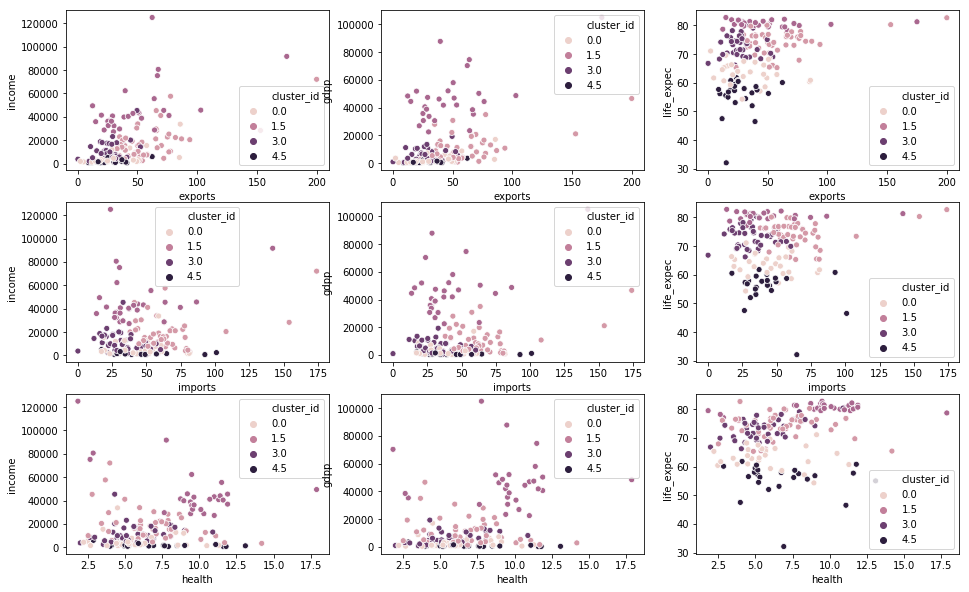

In [59]:
fig, axarr = plt.subplots(3, 3, figsize=(16, 10))

sns.scatterplot(x='exports', y='income', hue='cluster_id', data=clustered_countries, ax= axarr[0][0])
sns.scatterplot(x='exports', y='gdpp', hue='cluster_id', data=clustered_countries, ax= axarr[0][1])
sns.scatterplot(x='exports', y='life_expec', hue='cluster_id', data=clustered_countries, ax= axarr[0][2])
sns.scatterplot(x='imports', y='income', hue='cluster_id', data=clustered_countries, ax= axarr[1][0])
sns.scatterplot(x='imports', y='gdpp', hue='cluster_id', data=clustered_countries, ax= axarr[1][1])
sns.scatterplot(x='imports', y='life_expec', hue='cluster_id', data=clustered_countries, ax= axarr[1][2])
sns.scatterplot(x='health', y='income', hue='cluster_id', data=clustered_countries, ax= axarr[2][0])
sns.scatterplot(x='health', y='gdpp', hue='cluster_id', data=clustered_countries, ax= axarr[2][1])
sns.scatterplot(x='health', y='life_expec', hue='cluster_id', data=clustered_countries, ax= axarr[2][2])

plt.show()

#### Observations/ Conclusions:

Based on above plots following are our observations: 

1. Countries falling in the cluster_id = 4 have highest child mortality rates, lowest GDPP, lowest income, high inflation, lowest life expectancy, highest fertility rate and lowest exports among all clusters. This cluster contains the countries which is in most need of funding.

2. Cluster_id = 4 is followed by cluster_id = 0. These countries also have high child mortality rates, low GDPP, low income, high inflation, low life expectancy, high fertility rate and low exports. This cluster can also use funding if it is available after investing in cluster_id = 4.

3. Cluster_id = 0 is followed by cluster_id = 3. These countries have lower child mortality rate, inflation and total fertility rate than cluster_id = 0 and 4 but still higher than cluster_id = 1 and 2. They have higher GDPP, income and life expectancy than cluster_id = 0 and 4 but still higher than cluster_id = 1 and 2. 

4. Countries in cluster_id = 1 have low child mortality rates, high exports and imports, high GDP and income, low inflation and total fertility and high life expectancy. However, there is significant difference in all these numbers with other clusters. 

5. Countries in cluster_id = 2 have lowest child_mortality rates, lowest inflation, low fertility. They have high export, import, highest GDPP, highest income and life expectancy among all clusters. This cluster contains developed countries.


So, we can say that cluster_id = 4 contains the countries where help is most needed followed by countries in cluster_id = 4.

In [60]:
# These are the countries where most funding is required.
# Least Developed countries cluster_id = 4

clustered_countries[clustered_countries['cluster_id']==4]['country'].unique()

array(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Congo, Dem. Rep.',
       "Cote d'Ivoire", 'Guinea', 'Guinea-Bissau', 'Haiti', 'Lesotho',
       'Liberia', 'Malawi', 'Mali', 'Mozambique', 'Niger', 'Nigeria',
       'Sierra Leone', 'Togo', 'Uganda', 'Zambia'], dtype=object)

In [61]:
# Countries which can also use the funding if available
# Cluster_id = 0

clustered_countries[clustered_countries['cluster_id']==0]['country'].unique()

array(['Botswana', 'Comoros', 'Congo, Rep.', 'Equatorial Guinea',
       'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Iraq', 'Kenya', 'Kiribati',
       'Lao', 'Madagascar', 'Mauritania', 'Mongolia', 'Namibia',
       'Pakistan', 'Rwanda', 'Senegal', 'Solomon Islands', 'South Africa',
       'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Vanuatu',
       'Yemen'], dtype=object)

In [62]:
# cluster_id = 3

clustered_countries[clustered_countries['cluster_id']==3]['country'].unique()

array(['Albania', 'Algeria', 'Argentina', 'Armenia', 'Azerbaijan',
       'Bangladesh', 'Bolivia', 'Brazil', 'Chile', 'China', 'Colombia',
       'Costa Rica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Grenada', 'Guatemala', 'India', 'Indonesia',
       'Iran', 'Jamaica', 'Kazakhstan', 'Morocco', 'Myanmar', 'Nepal',
       'Peru', 'Philippines', 'Romania', 'Russia', 'Samoa',
       'Saudi Arabia', 'Sri Lanka', 'St. Vincent and the Grenadines',
       'Suriname', 'Tonga', 'Turkey', 'Uruguay', 'Uzbekistan',
       'Venezuela'], dtype=object)

In [63]:
# cluster_id = 1

clustered_countries[clustered_countries['cluster_id']==1]['country'].unique()

array(['Antigua and Barbuda', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus',
       'Belize', 'Bhutan', 'Bosnia and Herzegovina', 'Bulgaria',
       'Cambodia', 'Cape Verde', 'Croatia', 'Cyprus', 'Czech Republic',
       'Estonia', 'Fiji', 'Georgia', 'Guyana', 'Hungary', 'Jordan',
       'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania',
       'Macedonia, FYR', 'Malaysia', 'Maldives', 'Malta', 'Mauritius',
       'Micronesia, Fed. Sts.', 'Moldova', 'Montenegro', 'Oman', 'Panama',
       'Paraguay', 'Poland', 'Serbia', 'Seychelles', 'Singapore',
       'Slovak Republic', 'South Korea', 'Thailand', 'Tunisia',
       'Turkmenistan', 'Ukraine', 'United Arab Emirates', 'Vietnam'],
      dtype=object)

In [64]:
# Countries which dont need the funding (Most developed countries)
# cluster_id = 2

clustered_countries[clustered_countries['cluster_id']==2]['country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Brunei', 'Canada', 'Denmark',
       'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Kuwait', 'Luxembourg', 'Netherlands',
       'New Zealand', 'Norway', 'Portugal', 'Qatar', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'United Kingdom', 'United States'],
      dtype=object)

#### Hierarchial Clustering

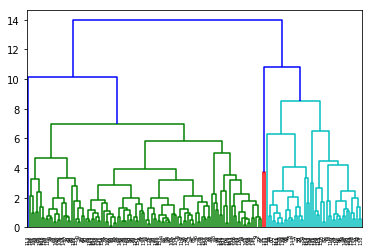

In [65]:
# heirarchical clustering without outlier treatment
df_hier_clust = pca_df.drop('country', axis=1)

mergings = linkage(df_hier_clust, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()



In [66]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
countries_hc = pd.concat([countries, clusterCut], axis=1)
countries_hc.columns = ['country', 'child_mort','exports', 'health', 'imports', 'income', 'inflation', 'life_expec','total_fer', 'gdpp','cluster_id']
countries_hc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [67]:
print(len(countries_hc[countries_hc['cluster_id']==0]['country'].unique()))
print(len(countries_hc[countries_hc['cluster_id']==1]['country'].unique()))
print(len(countries_hc[countries_hc['cluster_id']==2]['country'].unique()))
print(len(countries_hc[countries_hc['cluster_id']==3]['country'].unique()))
print(len(countries_hc[countries_hc['cluster_id']==4]['country'].unique()))

# We can see that this clustering is heavily skewed as some contain a high number of countires and some have only 1 or 2.

116
22
26
2
1


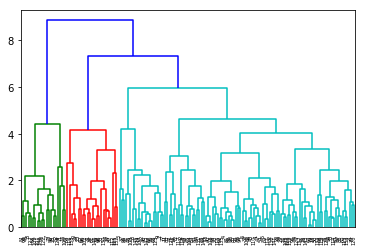

In [68]:
# heirarchical clustering after outlier treatment
df_hier_clust_final = df_outlier_done.drop(['country', 'cluster_id'], axis=1)

mergings_final = linkage(df_hier_clust_final, method = "complete", metric='euclidean')
dendrogram(mergings_final)
plt.show()

In [69]:
countries_hier = countries[countries['country'].isin(df_outlier_done['country'])]
countries_hier.reset_index(inplace=True)

In [70]:
# We will take cluster size = 5 by keeping the distance between 4 and 6. 
# If we decrease the distance any further the cluster size increases.

clusterCut_final = pd.Series(cut_tree(mergings_final, n_clusters = 5).reshape(-1,))
countries_hc_final = pd.concat([countries_hier, clusterCut_final], axis=1)

countries_hc_final.set_index('index', inplace=True)
countries_hc_final.columns = ['country', 'child_mort','exports', 'health', 'imports', 'income', 'inflation', 'life_expec','total_fer', 'gdpp','cluster_id']

In [71]:
countries_hc_final[countries_hc_final['cluster_id']==0]['country'].unique()


array(['Afghanistan', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon',
       'Central African Republic', 'Chad', 'Congo, Dem. Rep.',
       "Cote d'Ivoire", 'Guinea', 'Guinea-Bissau', 'Haiti', 'Malawi',
       'Mali', 'Mozambique', 'Niger', 'Rwanda', 'Sierra Leone', 'Sudan',
       'Tanzania', 'Timor-Leste', 'Uganda', 'Zambia'], dtype=object)

In [72]:
countries_hc_final[countries_hc_final['cluster_id']==1]['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Barbados', 'Belize', 'Bhutan', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde',
       'Chile', 'China', 'Colombia', 'Comoros', 'Costa Rica', 'Croatia',
       'Dominican Republic', 'Ecuador', 'El Salvador', 'Fiji', 'Gambia',
       'Georgia', 'Ghana', 'Grenada', 'Guatemala', 'Guyana', 'Iran',
       'Iraq', 'Jamaica', 'Jordan', 'Kenya', 'Kyrgyz Republic', 'Lao',
       'Latvia', 'Lebanon', 'Macedonia, FYR', 'Madagascar', 'Mauritius',
       'Moldova', 'Montenegro', 'Morocco', 'Namibia', 'Paraguay', 'Peru',
       'Poland', 'Romania', 'Russia', 'Samoa', 'Senegal', 'Serbia',
       'Solomon Islands', 'South Africa',
       'St. Vincent and the Grenadines', 'Suriname', 'Tajikistan', 'Togo',
       'Tonga', 'Tunisia', 'Turkey', 'Turkmenistan', 'Ukraine', 'Uruguay',
       'Vanuatu'], dtype=object)

In [73]:
countries_hc_final[countries_hc_final['cluster_id']==2]['country'].unique()

array(['Algeria', 'Angola', 'Azerbaijan', 'Bangladesh', 'Bolivia',
       'Congo, Rep.', 'Egypt', 'Eritrea', 'Gabon', 'India', 'Indonesia',
       'Kazakhstan', 'Mauritania', 'Myanmar', 'Nepal', 'Pakistan',
       'Philippines', 'Sri Lanka', 'Uzbekistan', 'Yemen'], dtype=object)

In [74]:
countries_hc_final[countries_hc_final['cluster_id']==3]['country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland',
       'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Italy',
       'Japan', 'Netherlands', 'New Zealand', 'Portugal', 'Spain',
       'Sweden', 'Switzerland', 'United Kingdom'], dtype=object)

In [75]:
countries_hc_final[countries_hc_final['cluster_id']==4]['country'].unique()

array(['Bahamas', 'Bahrain', 'Belarus', 'Cyprus', 'Czech Republic',
       'Estonia', 'Hungary', 'Israel', 'Libya', 'Lithuania', 'Malaysia',
       'Maldives', 'Panama', 'Slovak Republic', 'Slovenia', 'South Korea',
       'Thailand', 'Vietnam'], dtype=object)

This gives us almost same results as we got from k-means.
We can now follow same methods to add back the cluster_id for the outlier countries and can plot same graphs as above. 